In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Replacing blanks with 0 as tenusre is 0 and no charges are recorded
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0").astype("float")   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

np.int64(0)

In [10]:
#Converted 0 and 1 values of Senior Citizen column to no and yes.
def conv(val):
    if val == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


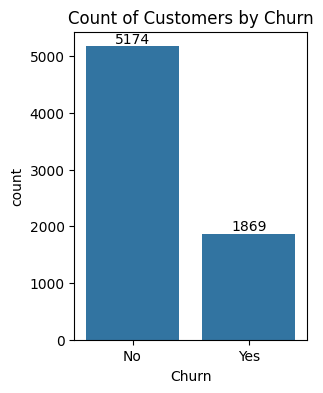

In [12]:
plt.figure(figsize=(3,4))

ax = sns.countplot(x=df["Churn"])


for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Customers by Churn")
plt.show()

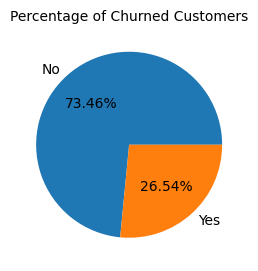

In [43]:
plt.figure(figsize=(3,4))
gb =df.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb["Churn"], labels=gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()


In [44]:
# From the given pie chart it can be concluded that 26.54% of customers have churned out.

In [45]:
#Lets explore the reason for the same

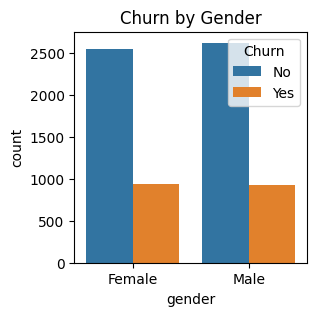

In [51]:
plt.figure(figsize=(3,3))
sns.countplot(x=df["gender"], data =df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

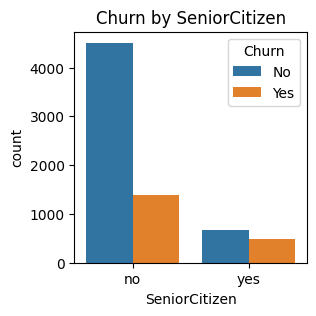

In [52]:
plt.figure(figsize=(3,3))
sns.countplot(x=df["SeniorCitizen"], data =df, hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

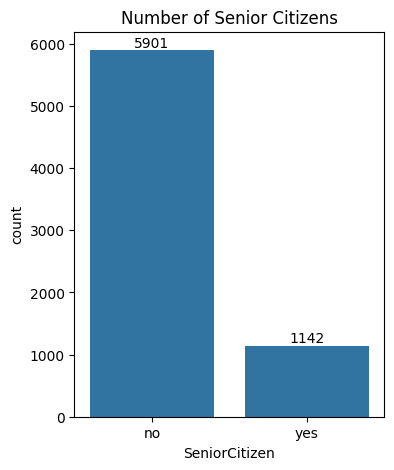

In [65]:
plt.figure(figsize=(4,5))
ax= sns.countplot(x=df["SeniorCitizen"])
plt.title("Number of Senior Citizens")


for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

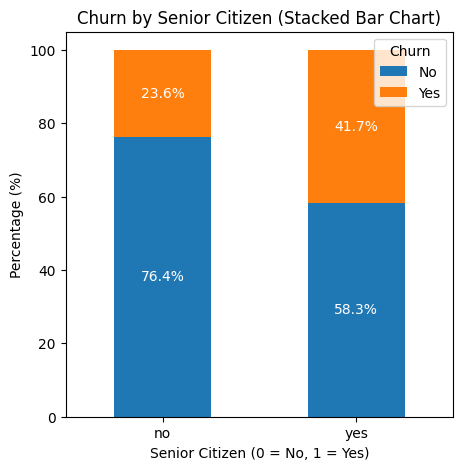

In [58]:
df = pd.DataFrame(df)

# Compute percentage distribution
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if needed

# Add percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Customizations
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
#Comparatively. a large percentage of senior citizens have churned out.

Text(0.5, 0, 'Customer Tenure (in months)')

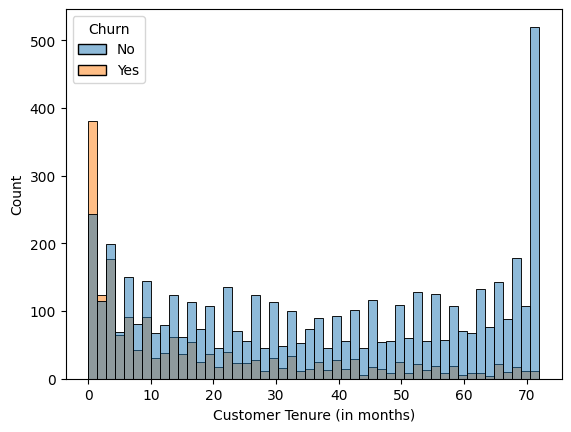

In [71]:
#plt.figure(figsize=(4,5))
sns.histplot(x=df["tenure"], data =df,bins = 50, hue = "Churn")
plt.xlabel("Customer Tenure (in months)") 

In [ ]:
#People who have used our 

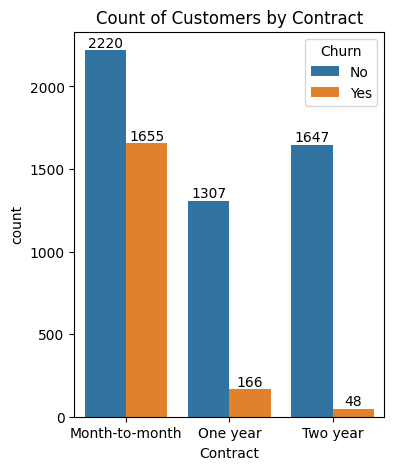

In [14]:
plt.figure(figsize=(4,5))
ax= sns.countplot(x=df["Contract"], data =df, hue="Churn")
plt.title("Count of Customers by Contract")


for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [ ]:
#People with Month-to-Month Contract are more likely to churn than those who opted for One or Two Years contract.

In [15]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

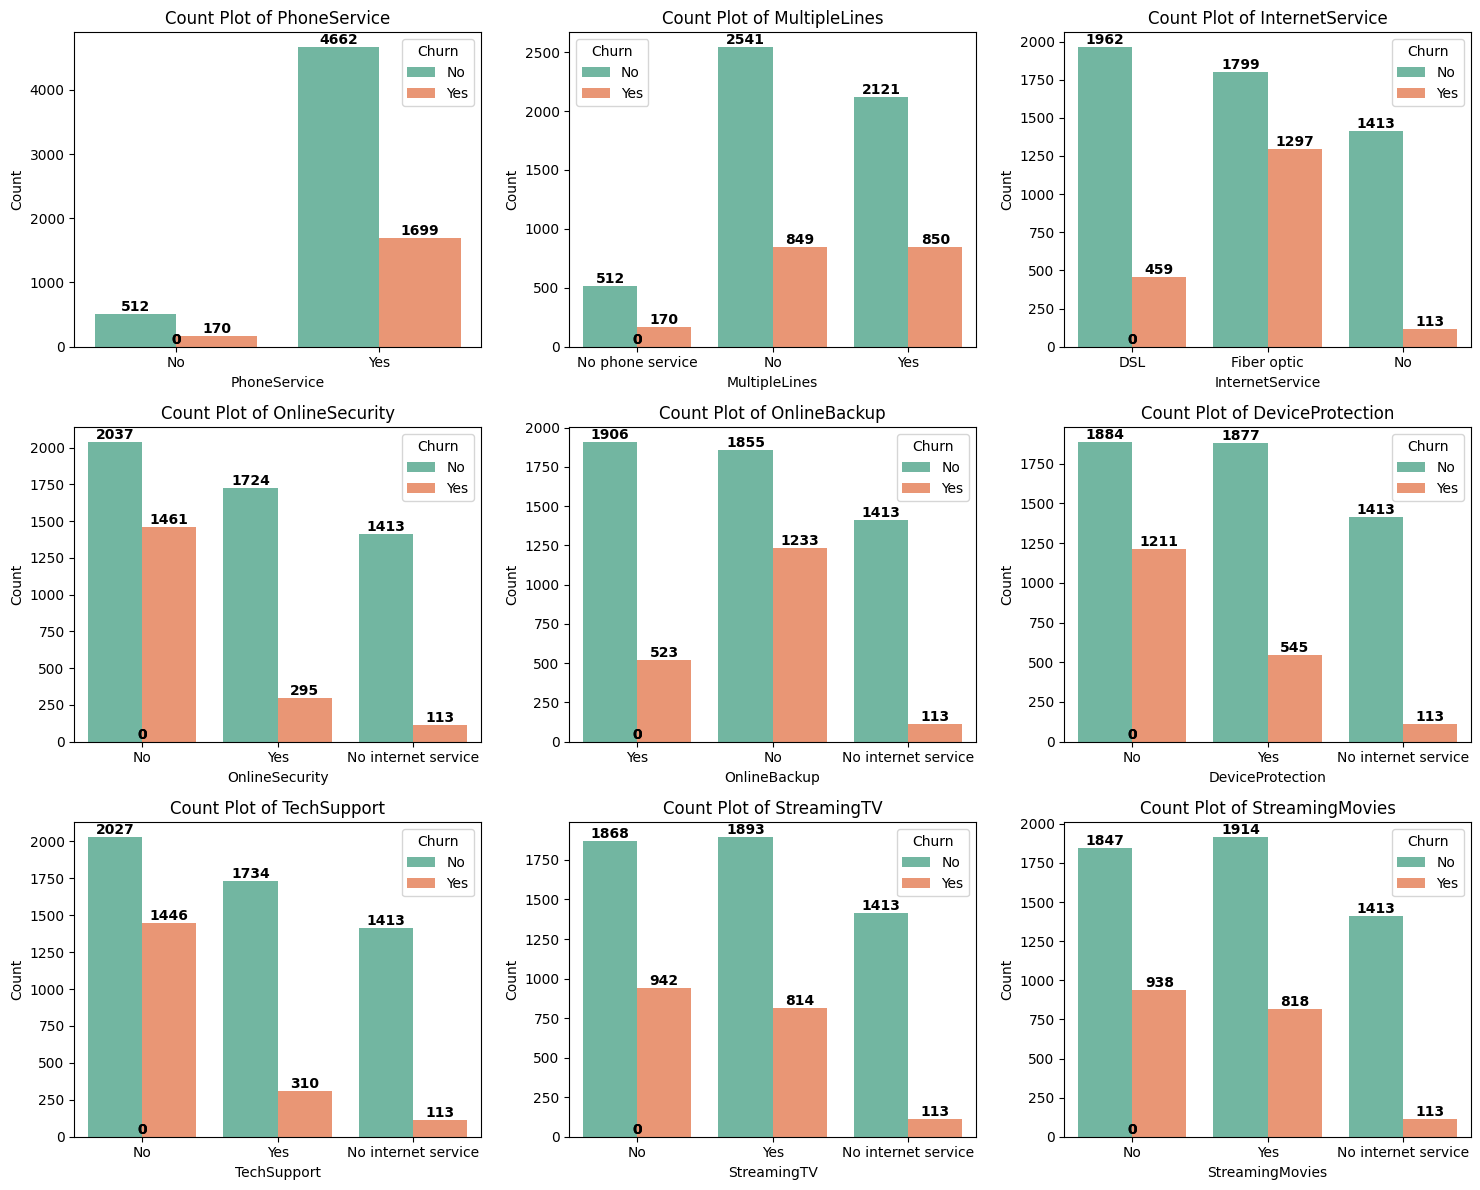

In [25]:
# List of columns for count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    ax = axes[i]
    plot = sns.countplot(x=col, data=data, ax=ax, palette='Set2', hue="Churn", legend=True)

    # Annotate each bar with count
    for p in plot.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove empty subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


 The data reveals that customers with "No Internet Service" consistently have the lowest counts across multiple features. Services like OnlineSecurity, 
 OnlineBackup, and TechSupport show a noticeable difference in churn rates, suggesting that customers lacking these services may be more likely to leave. Additionally, Fiber optic internet has a higher churn count compared to DSL, which could indicate potential service quality concerns.